In [2]:
import seaborn as sns
from sklearn.mixture import BayesianGaussianMixture
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

from pathlib import Path
import csv

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [3]:
def read_files(path, width=20, height=13):
    if not path:
        return None
    if path.is_dir():
        data = []
        for filename in path.glob('*'):
            data.extend(load_file(filename, width, height))
        return data
    else:
        return load_file(path, width, height)


def load_file(filename, width, height):
    reader = csv.reader(open(filename, 'r'), delimiter='\t')
    data = []
    for row in reader:
        data.extend(row)

    if len(data) % (13*20) != 0:
        raise Exception("Ammount of values in file {} doesn't match width {} and height {}".format(filename, width, height))
        
    return pd.to_numeric(data, errors='ignore', downcast='integer').reshape((-1, height, width))

In [4]:
legal = read_files(Path('../touchpad_capture/real_data/legal'))
illegal = read_files(Path('../touchpad_capture/real_data/illegal'))

nontouch = read_files(Path('../touchpad_capture/real_data/nontouches'))
touch = np.concatenate((legal, illegal)) # Doesn't matter if it's a finger (legal) or a palm (illegal), only care if it's touching the touchpad or not


In [5]:
touch_features = pd.DataFrame({
    "min": np.min(touch, axis=(1,2)),
    "max": np.max(touch, axis=(1,2)),
    "mean": np.mean(touch, axis=(1,2)),
    "var": np.var(touch, axis=(1,2)),
    "sum": np.sum(touch, axis=(1,2)),
    "ptp": np.ptp(touch, axis=(1,2)),
    "std": np.std(touch, axis=(1,2)),
    "trace": np.trace(touch, axis1=1, axis2=2),

    "target": 0
})

nontouch_features = pd.DataFrame({
    "min": np.min(nontouch, axis=(1,2)),
    "max": np.max(nontouch, axis=(1,2)),
    "mean": np.mean(nontouch, axis=(1,2)),
    "var": np.var(nontouch, axis=(1,2)),
    "sum": np.sum(nontouch, axis=(1,2)),
    "ptp": np.ptp(nontouch, axis=(1,2)),
    "std": np.std(nontouch, axis=(1,2)),
    "trace": np.trace(nontouch, axis1=1, axis2=2),

    "target": 1
})

features = pd.concat((nontouch_features, touch_features))

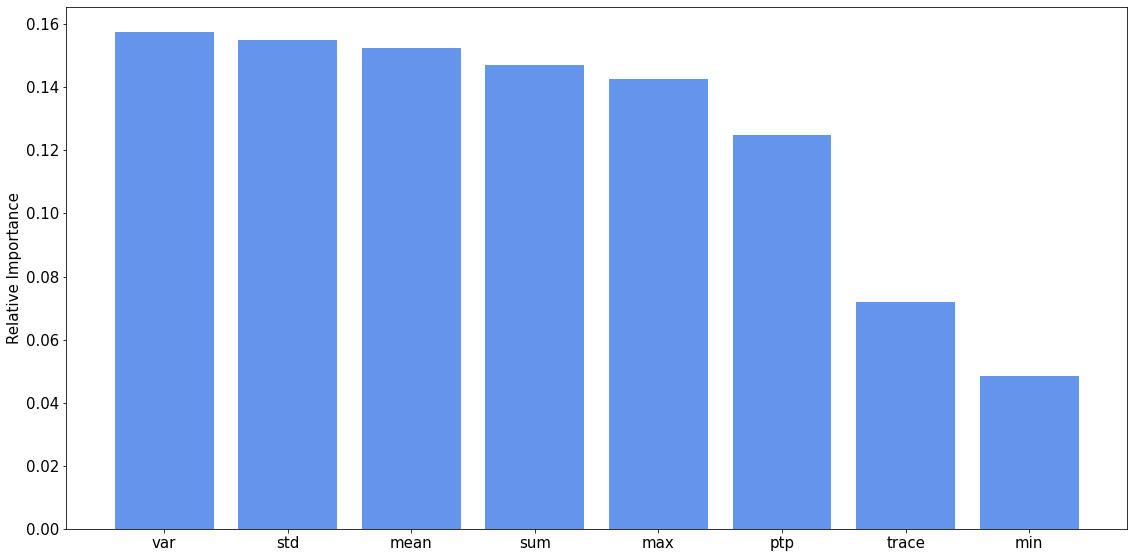

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split# Spliiting data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(features.drop('target', axis=1), features['target'], test_size=0.20, random_state=0)# fitting the model
model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)# plotting feature importances
features_forest = features.drop('target', axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(16,8))
plt.bar(range(len(indices)), importances[indices], color='cornflowerblue', align='center')
plt.xticks(range(len(indices)), [features_forest[i] for i in indices])
plt.ylabel('Relative Importance')
plt.tight_layout()
plt.savefig('figures/data_elim_feature_importances.pdf')
plt.show()

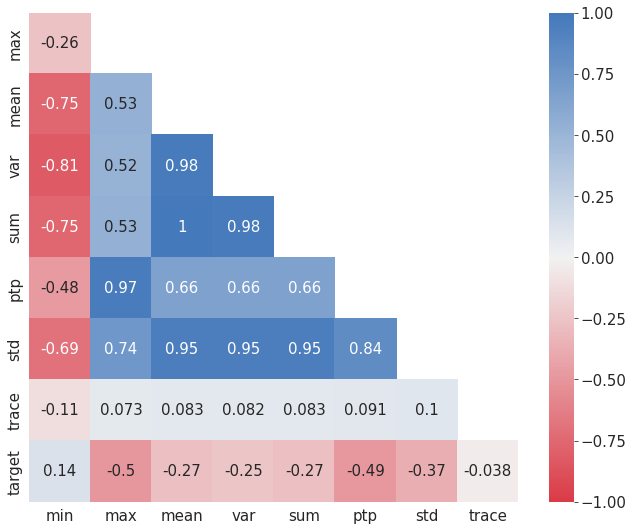

In [7]:
corr = features.drop('target', axis=1).corr().iloc[1: , :-1]
mask =  np.triu(np.ones_like(corr, dtype=np.bool), k=1)
sns.set_style(style = 'white')
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,
        square=True, vmin=-1, vmax=1, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), va="center")
plt.savefig('figures/data_elim_feature_corr.pdf')

SOURCE https://towardsdatascience.com/the-art-of-finding-the-best-features-for-machine-learning-a9074e2ca60d

In [8]:
features = features_backup
features

NameError: name 'features_backup' is not defined

In [ ]:
features[feature_types[0]]

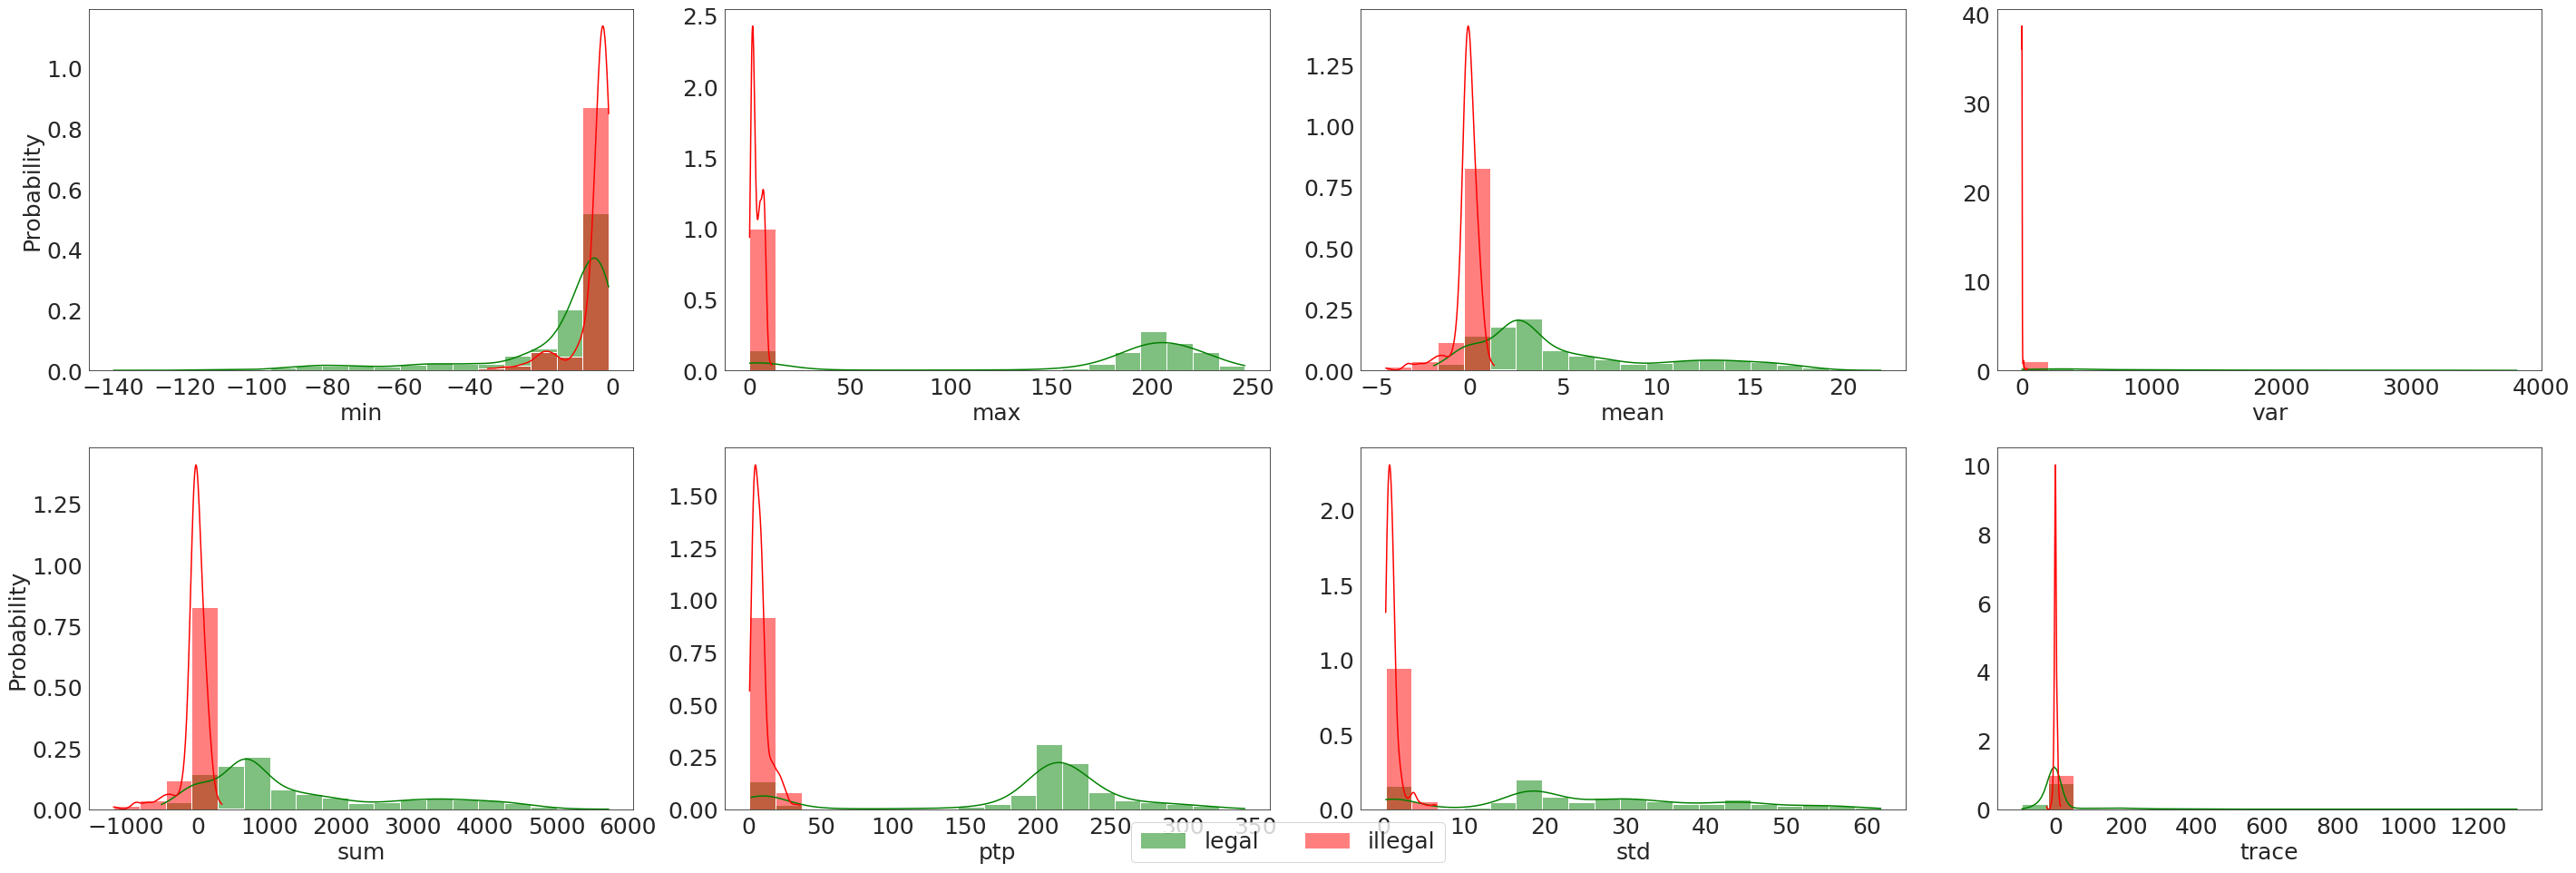

In [ ]:


feature_types = features.columns[: features.columns.slice_locs(end='trace')[1]]
n_bins = 20
fig = plt.figure(figsize=(40, 14))
plt.rcParams.update({'font.size': 25})
sns.set_style(style = 'white')

i = 1
for feature in feature_types: # Cycle through columns until and including "trace"
    ax = plt.subplot(2, 4, i)
    bins = np.linspace(features[feature].min(), features[feature].max(), n_bins)
    # sns.histplot(data=touch_features, x=feature, kde=True, hue="target", bins=bins, stat="probability", color='g', label='legal')
    sns.histplot(data=touch_features, x=feature, kde=True, bins=bins, stat="probability", color='g', label='legal', ax=ax)
    sns.histplot(data=nontouch_features, x=feature, kde=True, bins=bins, stat="probability", color='r', label='illegal', ax=ax)

    if i % 4 != 1:
        plt.ylabel(None)
    i += 1
handles, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2)
fig.tight_layout()
fig.subplots_adjust(top=0.95, bottom=0.075)
plt.savefig('figures/data_elim_feature_distrib.pdf')



In [ ]:
np.linspace(features['min'].min(), features['min'].max(), n_bins)

In [ ]:
np.linspace(features['mean'].min(), features['mean'].max(), n_bins)

In [ ]:
new_touch = np.clip(touch, -10, 245) + 10
new_nontouch = np.clip(nontouch, -10, 245) + 10

touch_features = pd.DataFrame({
    "min": np.min(new_touch, axis=(1,2)),
    "max": np.max(new_touch, axis=(1,2)),
    "mean": np.mean(new_touch, axis=(1,2)),
    "var": np.var(new_touch, axis=(1,2)),
    "sum": np.sum(new_touch, axis=(1,2)),
    "ptp": np.ptp(new_touch, axis=(1,2)),
    "std": np.std(new_touch, axis=(1,2)),
    "trace": np.trace(new_touch, axis1=1, axis2=2),

    "target": 0
})

nontouch_features = pd.DataFrame({
    "min": np.min(new_nontouch, axis=(1,2)),
    "max": np.max(new_nontouch, axis=(1,2)),
    "mean": np.mean(new_nontouch, axis=(1,2)),
    "var": np.var(new_nontouch, axis=(1,2)),
    "sum": np.sum(new_nontouch, axis=(1,2)),
    "ptp": np.ptp(new_nontouch, axis=(1,2)),
    "std": np.std(new_nontouch, axis=(1,2)),
    "trace": np.trace(new_nontouch, axis1=1, axis2=2),

    "target": 1
})

features = pd.concat((nontouch_features, touch_features))

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split# Spliiting data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(features.drop('target', axis=1), features['target'], test_size=0.20, random_state=0)# fitting the model
model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)# plotting feature importances
features_forest = features.drop('target', axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize=(10,15))
plt.barh(range(len(indices)), importances[indices], color='cornflowerblue', align='center')
plt.yticks(range(len(indices)), [features_forest[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('figures/data_elim_feature_importances.pdf')
plt.show()


In [ ]:
fig = plt.figure(figsize=(12, 16))
plt.rcParams.update({'font.size': 22})
i = 1
for feature in features.columns[: features.columns.slice_locs(end='trace')[1]]: # Cycle through columns until and including "trace"
    plt.subplot(4, 2, i)
    sns.histplot(data=touch_features, x=feature, kde=True, stat="probability", color='g', label='touch')
    sns.histplot(data=nontouch_features, x=feature, kde=True, stat="probability", color='r', label='nontouch')
    if i % 2 == 0:
        plt.ylabel(None)
    i += 1
handles, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2)
fig.tight_layout()
fig.subplots_adjust(top=0.95, bottom=0.1)
plt.savefig('figures/data_elim_feature_distrib.pdf')